###### label 
###### 1: Fake news
###### 2: Real news

In [1]:
import numpy as np
import pandas as pd
import re    #regular expression //importtant for searching words i text or paragraph 

from nltk.corpus import stopwords # nltk --> natural language toolkit. Corpus is the body for text 

from nltk.stem.porter import PorterStemmer # we will perform a function called stemming, 
                    #Stemming takes a word, removes prefux aand suffix of the word an get the root word of it
    
    
from sklearn.feature_extraction.text import TfidfVectorizer #  TfidfVectorizer -this function wil be used to
                                                            #   convert text into  feature vectors (numbers)
    
    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#download stopwads from nltk library 
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ruchikas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Stopwords are the words which does not add any value to the data. so we will remove them from the data

In [3]:
print(stopwords.words('english')) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data Preprocessing

In [4]:
#loading the dataset into pandas
data= pd.read_csv("train.csv")

In [5]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
data.shape

(20800, 5)

In [7]:
data = data.drop(columns='id', axis =1)

In [8]:
data.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
data.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
#replacing the null values with empty string.
data =data.fillna(' ')

In [11]:
data.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64


###     

##### For our prediction we are going to use title and author columns. We are not going to use text column, because these tet are so large and it will take a lot of time for procession

##### You can also use text data instead of title and author for prediction  

In [12]:
# combining author and title
data['content'] = data['author'] +data['title']


In [13]:
data.head()

,title,author,text,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [14]:
# seperating x and Y
X = data.drop(columns='label', axis =1) #data['content']
Y= data['label']

In [15]:
X.head()

,title,author,text,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.comWhy the Truth Might Get You ...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss15 Civilians Killed In Single U...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard PortnoyIranian woman jailed for fiction...


In [16]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

##### Stemming: 

###### Stemming is the pocess of coverting a word into its root word 
###### Actor, Actress, Acting ---->> Act

##### Oncewe do this procedure of converting the word into its root word. We will perform the fuction of vectorizing.  
##### In Vectorising, we will conver these words into their feature vectors ie, numberical data

In [17]:
port_stem = PorterStemmer() #creating object of the function
    

In [18]:
def stemming(content):  # content is any text that you can pass
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) #we are calling regular expression librabry
    stemmed_content = stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=  [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # performing stemming function and removing stop words
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [19]:
data['content'] = data['content'].apply(stemming)

In [20]:
print(data['content'])

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: content, Length: 20800, dtype: object


In [21]:
# Seperating data and label
#.values used to get a Numpy representation of the DataFrame.
X= data['content'].values
Y = data['Label'].values    
print(X)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']


### Converting Textual data to numberical data

foo <font color='red'>
##### Tf stands for term frequency and IDF stands for inverse document frequency 
##### Tf - counts te number of times a particular word repeating in a particular Text paragraph 
##### more the word is repeated more importance it gets in terms of value
##### idf - sometimes, the words which is repeaded may times but doesn't have meaning to it.
#####       eg. in movie review for Avengers. 'Avengers' does not have more importance in the review statements.
#####       TFD will reduce the importance of such words.
   </font> foo

In [24]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [25]:
print(X)

  (0, 26340)	0.28088379401596425
  (0, 22724)	0.25523360180691607
  (0, 15019)	0.43006226759639316
  (0, 14555)	0.29177259684200296
  (0, 12782)	0.24619727512767195
  (0, 8022)	0.23133661742488731
  (0, 6273)	0.2839932825877813
  (0, 5969)	0.35488202138141456
  (0, 5006)	0.24725958235728157
  (0, 4211)	0.3625320323150658
  (0, 578)	0.2694167078545385
  (1, 27923)	0.3691184595384501
  (1, 11313)	0.24166773097712632
  (1, 8772)	0.5258635625386451
  (1, 5916)	0.3181005810963805
  (1, 4767)	0.23338756776626787
  (1, 3859)	0.45980466668763464
  (1, 3281)	0.18652439327549422
  (1, 2622)	0.3562953366945266
  (2, 26235)	0.3665032495181434
  (2, 16361)	0.43295215406038445
  (2, 9454)	0.30743020569262086
  (2, 8567)	0.34119474140208966
  (2, 5240)	0.40440534260277944
  (2, 5121)	0.5511414848555652
  :	:
  (20797, 25776)	0.08220218573989037
  (20797, 25319)	0.3119640221826561
  (20797, 22086)	0.24902354987792552
  (20797, 20778)	0.2729578683228216
  (20797, 20493)	0.249994989010826
  (20797, 1750

   ##### stratify - Y has 0 and 1 values. stratify will segrigate the values of 0 and 1 in y_test and y_train, in the same proportion that is present in the main dataset 

In [34]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=4)

### Training the Model- Logistic Regression Model 


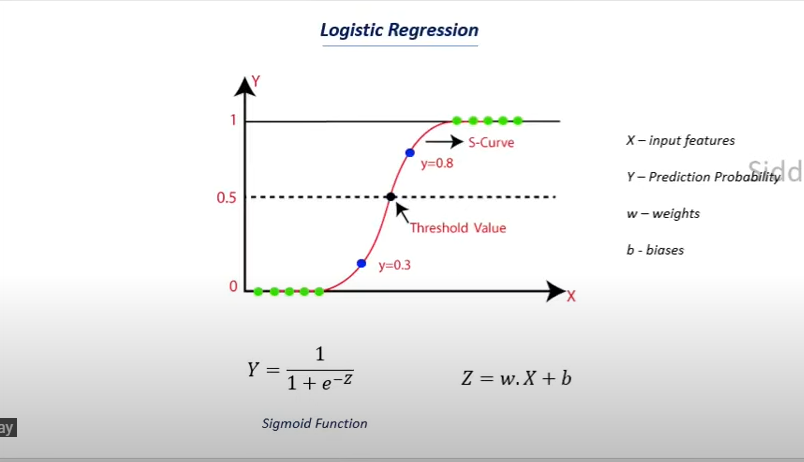

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Evaluation
#### Accuracy score 

In [37]:
# Accuracy score on the training data
x_train_ped = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_ped,y_train)
print("accuracy score for train  is : ",training_data_accuracy)

accuracy score for train  is :  0.971514423076923


In [38]:
# Accuracy score on the test data
x_test_ped = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_ped,y_test)
print("accuracy score for test  is : ",test_data_accuracy)

accuracy score for test  is :  0.9509615384615384


####  Saving the Trained model

In [44]:
import pickle

In [47]:
filename= 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))   # wb is write in binary 


#### Loading the saved model

In [48]:
loaded_model= pickle.load(open('trained_model.sav', 'rb'))